Data is from a research group in Computer Science at UBC exploring how people play video games. Players navigation of the world is recorded. The team created 2 csvs - players.csv observing unique players and data about them, and sessions.csv observing individual sessions and information about the session. Purpose of study: to target recruitment efforts. 

Sessions.csv (1535 rows) 
- 5 columns: 
    - 2 decimal:
        - original_start_time and original_end_time -  indicating raw timestamp of session
    - 3 character:
        - hashedEmail
        - start_time + end_time (human-readable date-time format, reporting when a user logged on/off for a session). 

Players.csv (197 rows) 
- 7 columns: 
  - 2 decimal:
    - Age (of user) 
    - played_hours (indicating users' hours played). 
  - 3 character:
    - experience (specifies user gaming experience - pro, veteran, amateur, regular, beginner)
    - name
    - gender (male, female, prefer not to say, non-binary, other, two-spirited, agender). 
  - 1 logical:  
    - Subscribe (indicates whether user is subscribed to game newsletter - TRUE/FALSE). 

Players.csv has unique hashed emails, while sessions.csv repeats hashedEmail per session. 


In [5]:
library(tidyverse)

In [16]:
sessions<- read_csv("sessions.csv")
players <- read_csv("players.csv")
head(sessions)
head(players)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


# **Summary Statistics:**

## **Count Findings:**

**Subscribe:** Will need to oversample rare class (FALSE) in prediction

In [34]:
subscribe_count <- players|>
count(subscribe)

subscribe_count

subscribe,n
<lgl>,<int>
FALSE,52
TRUE,144


**Played Hours:** 85/197 played 0 hours - raises concern. 

In [56]:
played_hours_count <- players|>
count(played_hours)

played_hours_count

played_hours,n
<dbl>,<int>
0.0,85
0.1,34
0.2,10
0.3,5
0.4,5
0.5,4
0.6,5
0.7,3
0.8,2


**Experience:** Relatively equal - lower pro count.

In [36]:
experience_count <- players |>
  count(experience)

experience_count

experience,n
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


**Gender:** Mostly males, followed by females. Unequal count distribution

In [38]:
gender_count <- players |>
  count(gender)

gender_count

gender,n
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


**Player Hashed Email:** only 1 per player

In [40]:
players_email_count <- players |>
  count(hashedEmail)

head(players_email_count)

hashedEmail,n
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,1
055d1a2002f6308a95b03b8d17af28f43e9f91ca8b1e1fc439bf4d08b22e7c0f,1
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,1
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,1


**Sessions Hashed Email:** Some players play more often (range from 1-310)

In [43]:
sessions_email_count <- sessions |>
  count(hashedEmail)

(sessions_email_count)

hashedEmail,n
<chr>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1
119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,1
18936844e06b6c7871dce06384e2d142dd86756941641ef39cf40a9967ea14e3,41
1a2b92f18f36b0b59b41d648d10a9b8b20a2adff550ddbcb8cec2f47d4d881d0,1


**Age:**
- Range = 9-58 
- mode = 17
- majority players <25

In [47]:
age_count <- players |>
count(Age)

age_count

Age,n
<dbl>,<int>
9,1
10,1
11,1
12,1
14,2
15,2
16,3
17,73
18,7


## **Standard Deviation Findings:**

**Played Hours:** Avg playtime differs by 28 hours (High SD)

In [57]:
sd_hours_played <- players |>
    summarize(sd_played_hours = sd(played_hours)) |>
    round(digits = 2)
sd_hours_played

sd_played_hours
<dbl>
28.36


**Age:** 7.4 years (High SD)

In [58]:
sd_age<- players |>
    summarize(sd_age = sd(Age, na.rm =TRUE)) |>
    round(digits = 2)
sd_age

sd_age
<dbl>
7.39


**OST:** 3557491589 seconds from mean timestamp

In [59]:
sd_original_start_time <- sessions |>
    summarize(original_start_time_sd = sd(original_start_time, na.rm=TRUE)) |>
    round(digits = 2)
sd_original_start_time

original_start_time_sd
<dbl>
3557491589


**OET:** 3552813134 seconds from mean timestamp

In [60]:
sd_original_end_time <- sessions |>
    summarize(original_end_time_sd = sd(original_end_time,na.rm=TRUE)) |>
    round(digits = 2)
sd_original_end_time

original_end_time_sd
<dbl>
3552813134


**Mean Findings:**

**Hours Played:** 5.85 (low-end) 
**Age:** Young
**OST:** 1.719201e+12
**OET:** 1.719196e+12

In [61]:
mean_hours_played <- players |>
    summarize(mean_played_hours = mean(played_hours)) |>
    round(digits = 2)
mean_hours_played

mean_played_hours
<dbl>
5.85


**Age:** Relativley Young (21) considering range (9-58)

In [65]:
mean_age<- players |>
    summarize(age_mean = mean(Age, na.rm =TRUE)) |>
    round(digits = 2)
mean_age

age_mean
<dbl>
21.14


**OST:** 4:43 pm UTC - people tend to start in late afternoon.

In [68]:
mean_original_start_time <- sessions |>
    summarize(original_start_time_mean = mean(original_start_time, na.rm=TRUE)) |>
    round(digits = 2)
mean_original_start_time

original_start_time_mean
<dbl>
1.719201e+12


**OET:** Approx. 3:20 pm UTC - people tend to end in late afternoon. 

In [69]:
mean_original_end_time <- sessions |>
    summarize(original_end_time_mean = mean(original_end_time,na.rm=TRUE)) |>
    round(digits = 2)
mean_original_end_time

original_end_time_mean
<dbl>
1.719196e+12


**Min Findings:**

**Played Hours:** Some people did not play
**Age:** young players


**Original Start:** 1.7124e+12 
**Original End:** 
- Earliest session started and ended at same time


In [70]:
min_hours_played <- players |>
    summarize(min_played_hours = min(played_hours)) |>
    round(digits = 2)
min_hours_played

min_played_hours
<dbl>
0


**Age:** young players

In [72]:
min_age<- players |>
    summarize(age_min = min(Age, na.rm =TRUE)) |>
    round(digits = 2)
min_age

age_min
<dbl>
9


**OST + OET:**
- Earliest session started and ended at same time

In [74]:
min_original_start_time <- sessions |>
    summarize(original_start_time_min = min(original_start_time, na.rm=TRUE)) |>
    round(digits = 2)
min_original_start_time

min_original_end_time <- sessions |>
    summarize(original_end_time_min = min(original_end_time,na.rm=TRUE)) |>
    round(digits = 2)
min_original_end_time

original_start_time_min
<dbl>
1.7124e+12


original_end_time_min
<dbl>
1.7124e+12


**Max Findings:**

**Played Hours:** 
- wide variation across min and max hours played (0-223.1)
- Age: 58 (old players) - wide variation
- Original Start: 1.72733e+12
- Original End: 1.72734e+12 

In [75]:
max_hours_played <- players |>
    summarize(max_played_hours = max(played_hours)) |>
    round(digits = 2)
max_hours_played

max_played_hours
<dbl>
223.1


**Age:** 58 (old players) 
    - wide variation

In [76]:
max_age<- players |>
    summarize(age_max = max(Age, na.rm =TRUE)) |>
    round(digits = 2)
max_age

age_max
<dbl>
58


**OST**: 1.72733e+12 - explain what means 

In [77]:
max_original_start_time <- sessions |>
    summarize(original_start_time_max = max(original_start_time, na.rm=TRUE)) |>
    round(digits = 2)
max_original_start_time

original_start_time_max
<dbl>
1.72733e+12


**OET:** 1.72734e+12 - explain what means 

In [78]:
max_original_end_time <- sessions |>
    summarize(original_end_time_max = max(original_end_time,na.rm=TRUE)) |>
    round(digits = 2)
max_original_end_time

original_end_time_max
<dbl>
1.72734e+12


**Questions:**
- Broad: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

- Subquestion: Can Gender and Age predict Subscription in players.csv?

**Data Analysis - Exploratory**

Proportion data computed to understand the counts better, accounts for category imbalances - relevant for graphs. 

In [30]:
ratio_gender_subscribed <- players |>
  group_by(gender) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)


ratio_gender_subscribed

ratio_experience_subscribed <- players |>
  group_by(experience) |>
  summarize(
    total = n(),
    subscribed = sum(subscribe == TRUE),
    percentage_subscribed = (subscribed / total)*100)


ratio_experience_subscribed

gender,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Agender,2,2,100.00000
Female,37,29,78.37838
Male,124,93,75.00000
Non-binary,15,11,73.33333
Other,1,1,100.00000
Prefer not to say,11,4,36.36364
Two-Spirited,6,4,66.66667


experience,total,subscribed,percentage_subscribed
<chr>,<int>,<int>,<dbl>
Amateur,63,45,71.42857
Beginner,35,27,77.14286
Pro,14,10,71.42857
Regular,36,29,80.55556
Veteran,48,33,68.75000


Quantitative means - players.csv
Played Hours: fairly low (5.85 hours) 
Age: young age (21.14)

In [31]:
#mean of the quantitative variable played hours
mean_hours_played <- players |>
    summarize(mean_played_hours = mean(played_hours)) |>
    round(digits = 2)
mean_hours_played


#mean of the quantitative variable age
mean_age<- players |>
    summarize(age_mean = mean(Age, na.rm =TRUE)) |>
    round(digits = 2)
mean_age

mean_played_hours
<dbl>
5.85


age_mean
<dbl>
21.14


**Graphs:**

1: Subscribed Count (TRUE) VS Not Subscribed Count (FALSE). Makes clear that in future steps, we will need to oversample the rare class (FALSE). 

2: Age VS played_hours, color by subscribed. Younger players have higher played hours (somewhat negative relationship, weak, nonlinear), but younger players (>25) make up significantly more data points. Higher played hours and lower age correlate to subscription. Played hours and age can be looked at as predictors for subscription. 

3: Gender counts show males then females have the highest subscriptions, likely due to larger sample sizes. 

4: Percentage subscribed by gender shows women have a higher subscription rate than men, though small-category sizes limit inference. Data limitations are still prevalent (very limited for agender and other). We can see a change in the dominating gender when we look at proportion instead of count. Gender is likely a predictive variable. 

5: Experience vs subscribed count. Amaterus have the highest subscribe count, but also has the highest total count. Experience distribution is more even than gender distribution.

6: Shows regulars have the highest rate percentage of subscribed users across various experience categories, but differences are small, so experience may be less predictive than gender or played hours. 


Subscribed Count (TRUE) VS Not Subscribed Count (FALSE). 
- Clarifies need to ovsersample rare class (FALSE)  in future clear that in future steps. 

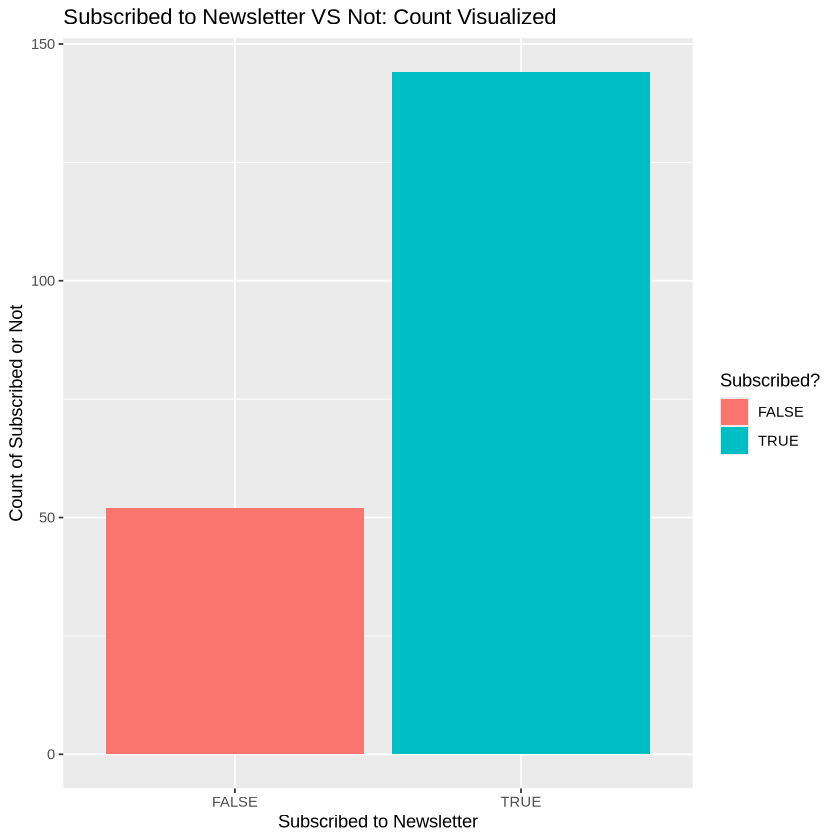

In [80]:
subscribed_count_bargraph <- subscribe_count|>ggplot(aes(x=subscribe, y=n, fill=subscribe))+
geom_bar(stat="identity") + 
labs(x="Subscribed to Newsletter", y="Count of Subscribed or Not", fill="Subscribed?")+
ggtitle("Subscribed to Newsletter VS Not: Count Visualized")

subscribed_count_bargraph


Age vs played_hours, color by subscribed. 
- Younger players have higher played hours (somewhat negative relationship, weak, nonlinear). 
- More data points for younger players (>25). Higher played hours + lower age correlate to subscription.
- Played hours + age likely predictive of subscription. 


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


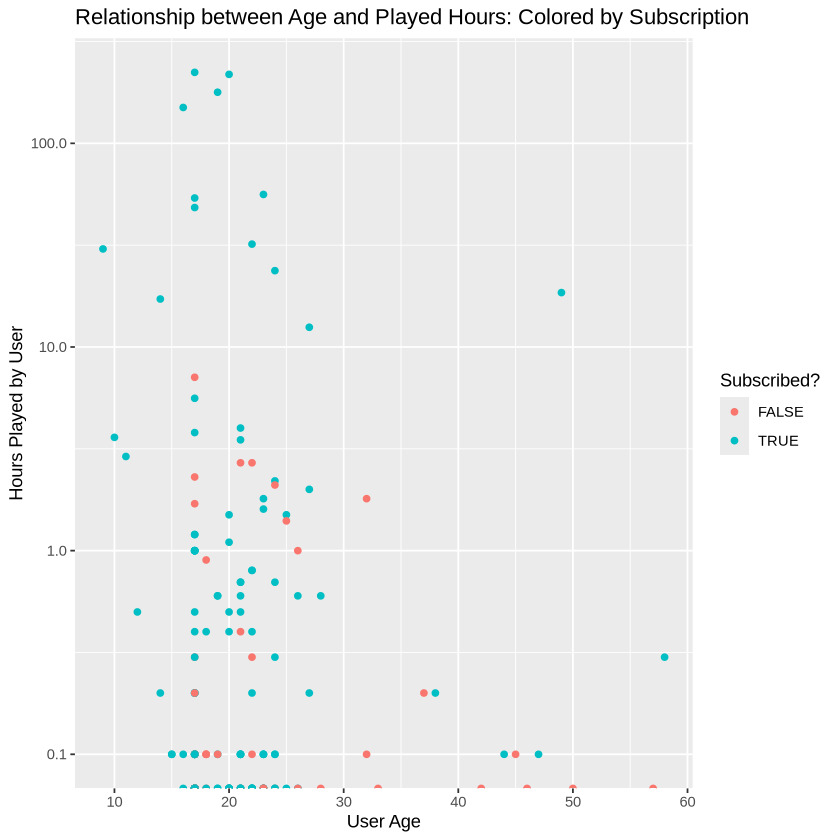

In [81]:
age_vs_played_hours <- players|>ggplot(aes(x=Age, y=played_hours, color=subscribe))+
geom_point() +
scale_y_log10() +
labs(x="User Age", y="Hours Played by User", color="Subscribed?")+
ggtitle("Relationship between Age and Played Hours: Colored by Subscription")

age_vs_played_hours

Gender counts show males then females have highest subscriptions. 
- Likely because more data points. 

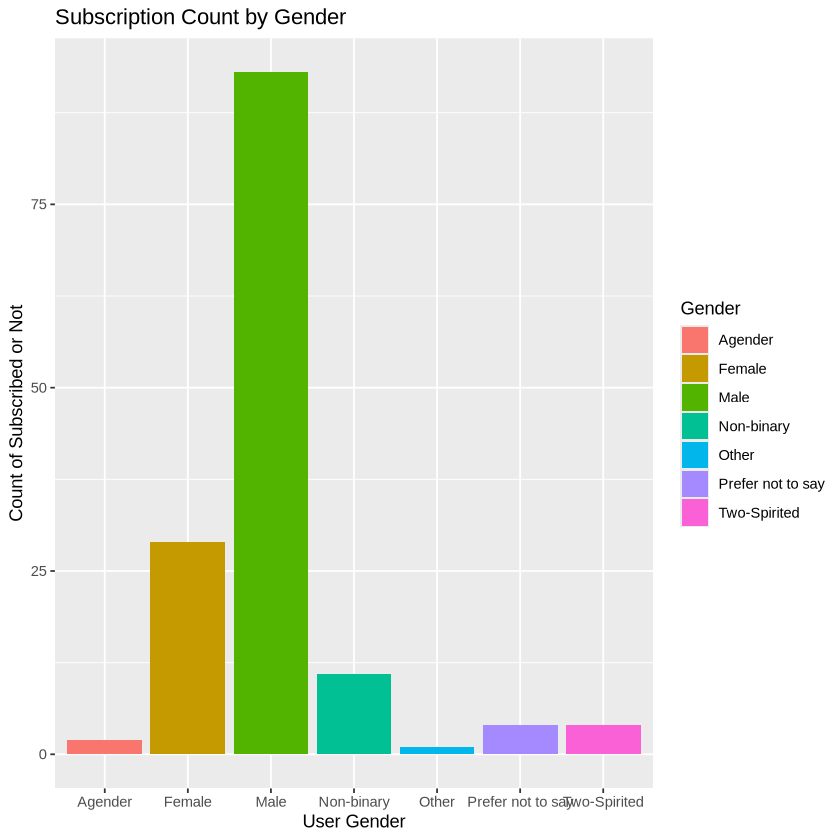

In [83]:
gender_subscribed_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=subscribed,, fill=gender))+
geom_bar(stat="identity") + 
labs(x="User Gender", y="Count of Subscribed or Not", fill="Gender")+
ggtitle("Subscription Count by Gender")

gender_subscribed_bar

Percentage subscribed by gender - women have a highest subscription rate.
- Small-category sizes limit inference.
- Data limitations prevalent ( limited data for agender and other).
- Change in the dominating gender observed when looking at proportion instead of count.
- Likely a predictive variable. 

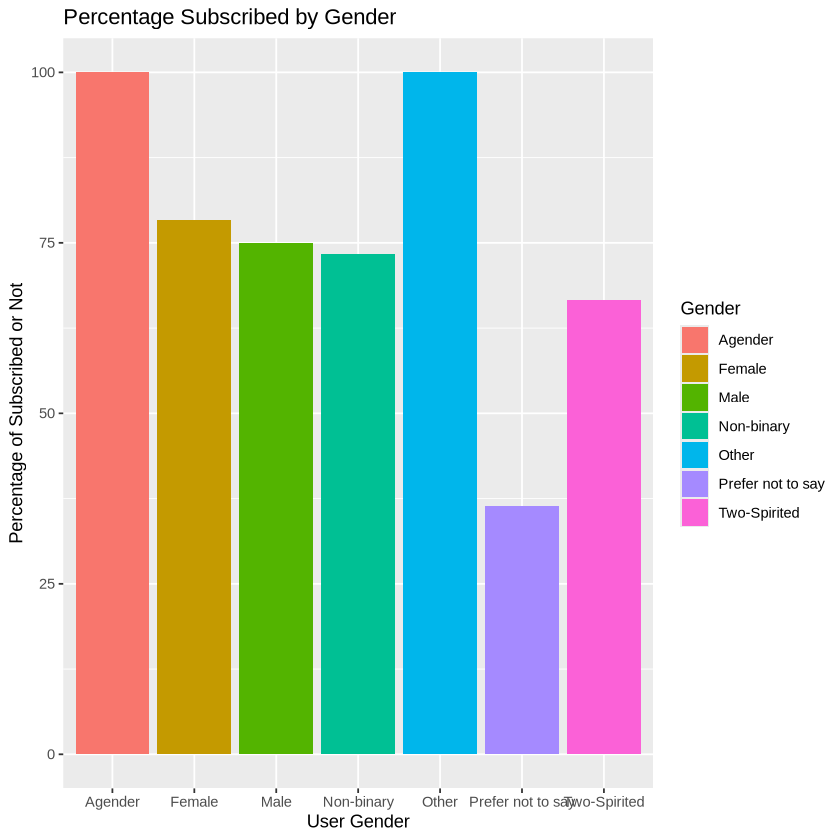

In [84]:
gender_subscribed_ratio_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=percentage_subscribed, fill=gender))+
geom_bar(stat="identity") +
labs(x="User Gender", y="Percentage of Subscribed or Not", fill="Gender")+
ggtitle("Percentage Subscribed by Gender")


gender_subscribed_ratio_bar


Experience vs subscribed count. Highest subscribe count = Amateurs - also highest total count. 
- Relatively even distribution. 


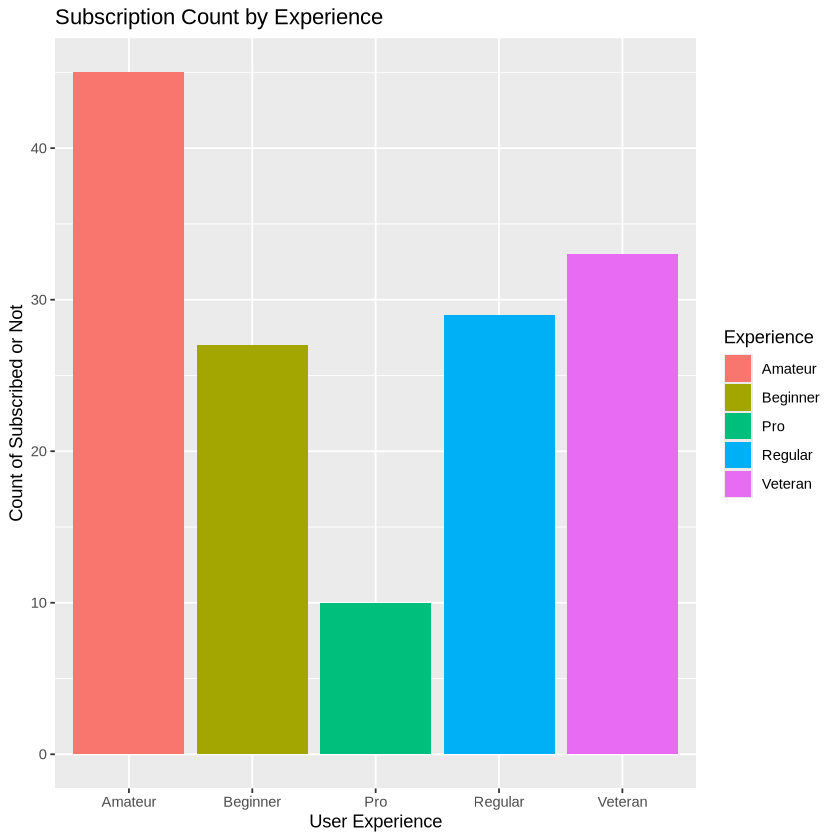

In [85]:
experience_subscribed_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Count of Subscribed or Not", fill="Experience")+
ggtitle("Subscription Count by Experience")

experience_subscribed_bar

Regulars have highest subscribed percentage users across various experience categories - differences are small, so experience may be less predictive than gender or played hours.

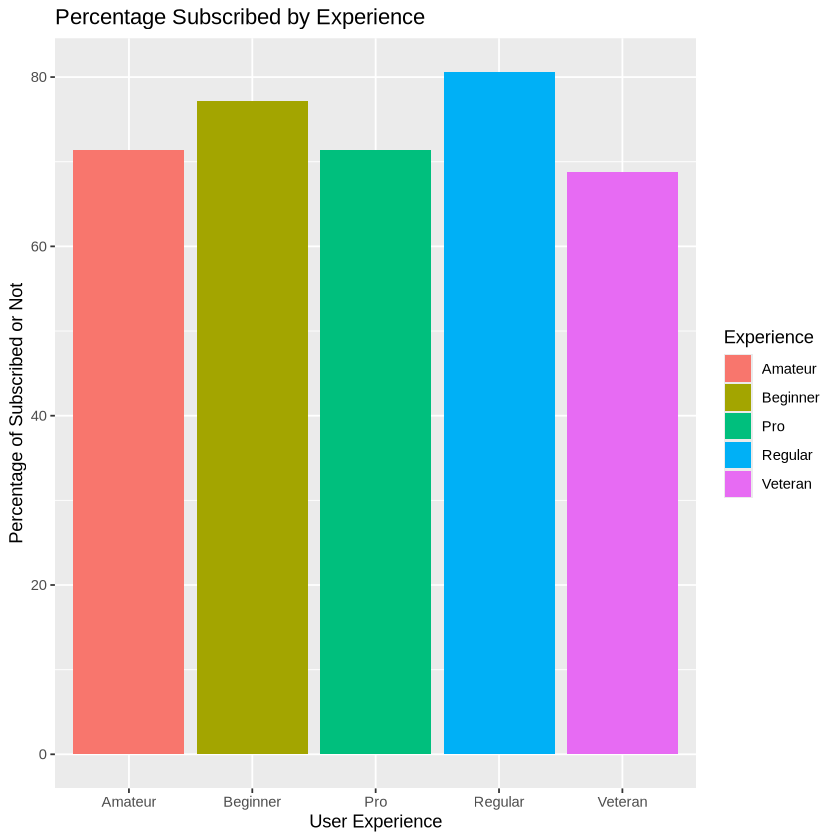

In [86]:
experience_subscribed_ratio_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=percentage_subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Percentage of Subscribed or Not", fill="Experience")+
ggtitle("Percentage Subscribed by Experience")
experience_subscribed_ratio_bar

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


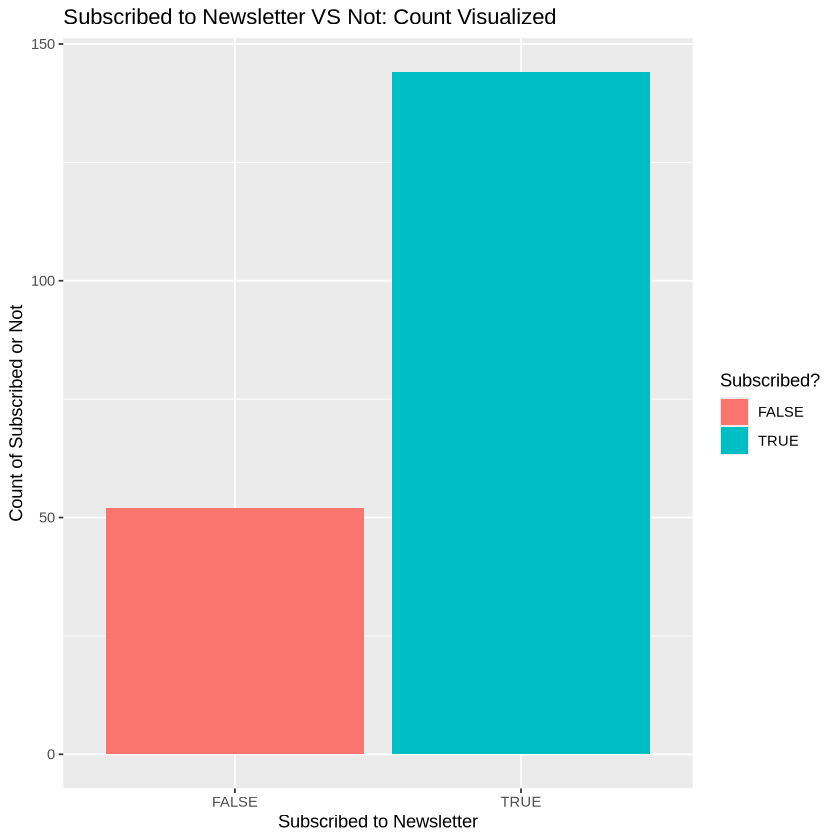

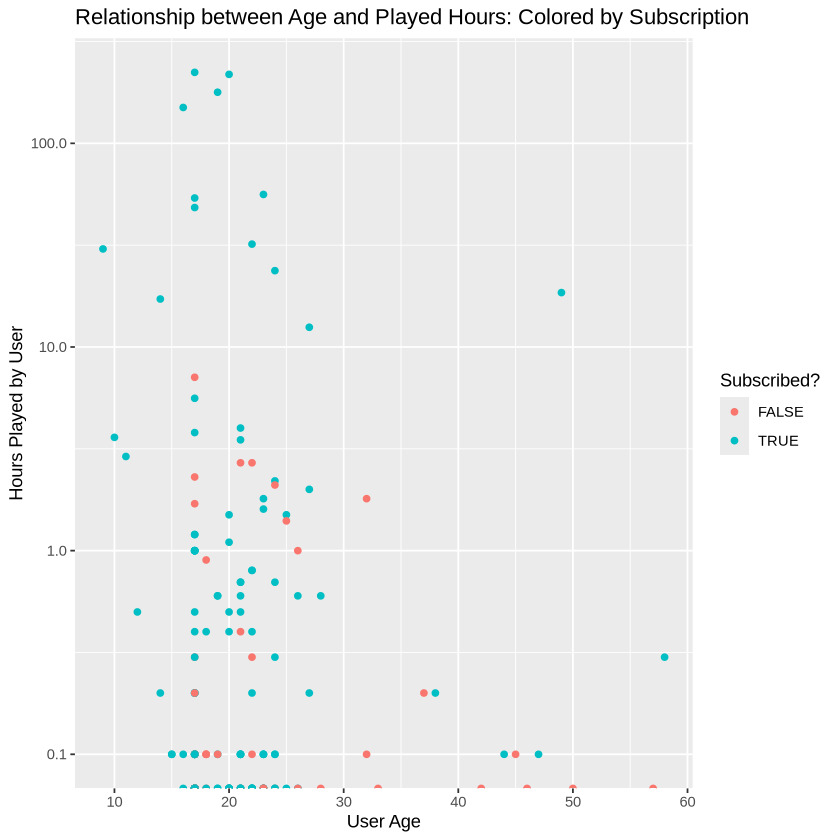

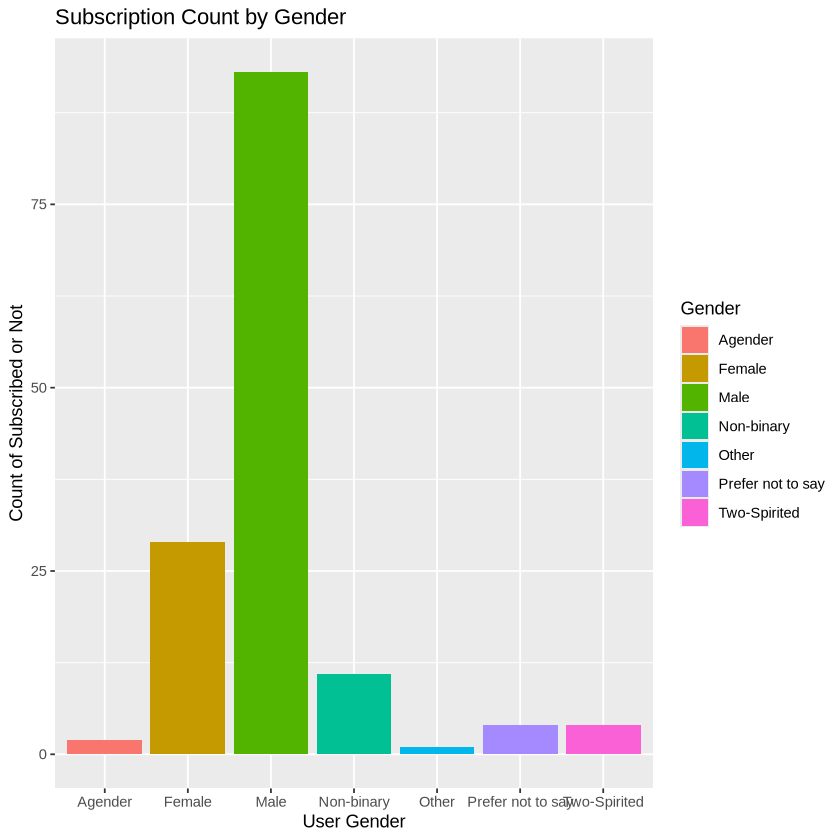

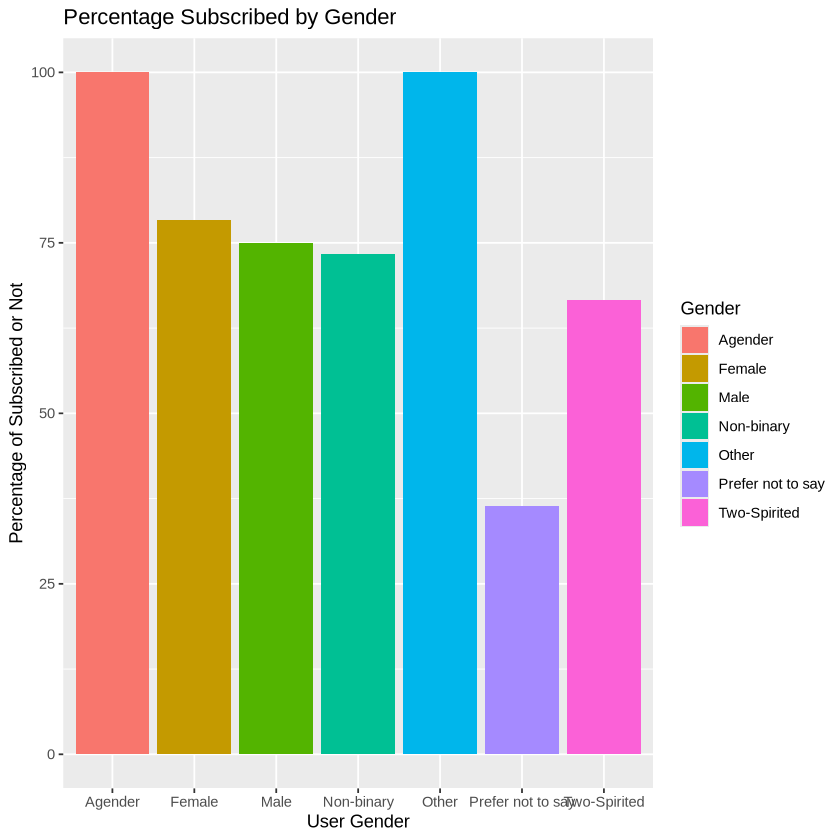

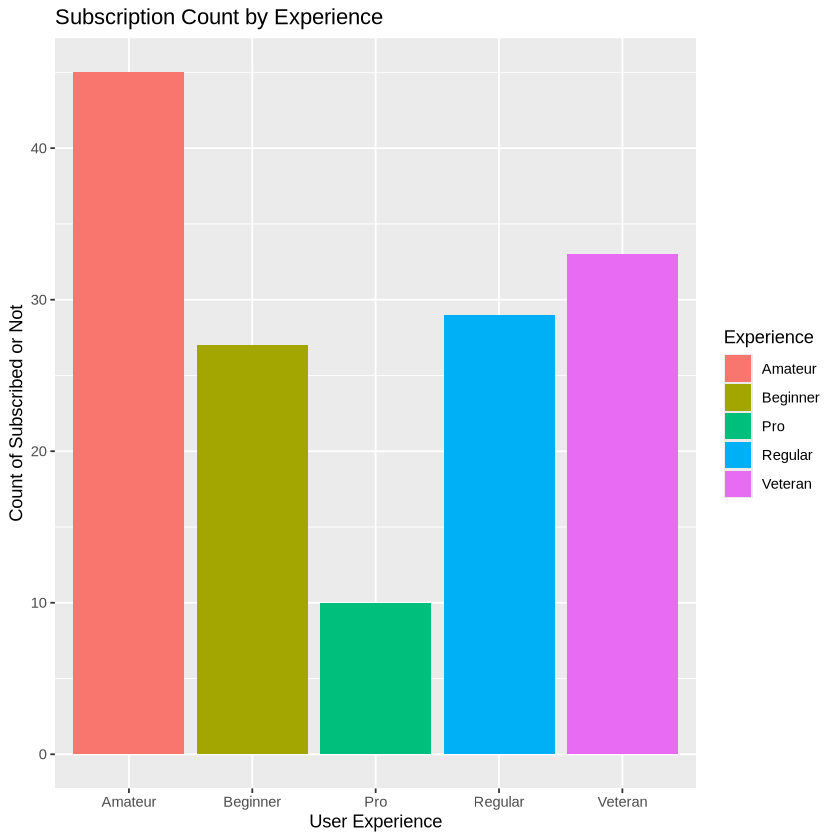

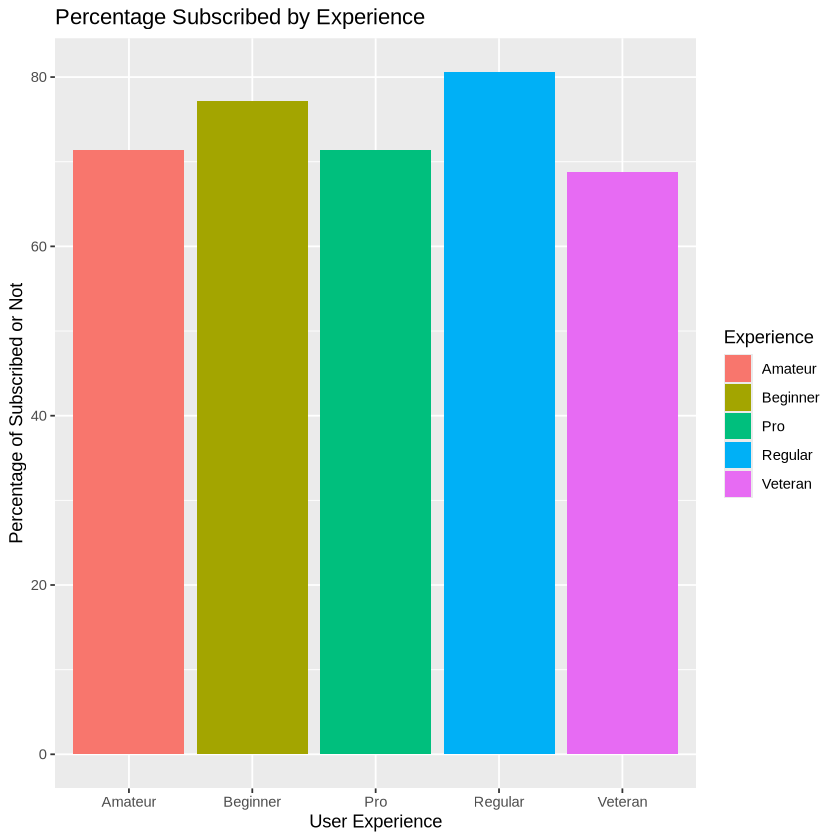

In [33]:
subscribed_count_bargraph <- subscribe_count|>ggplot(aes(x=subscribe, y=n, fill=subscribe))+
geom_bar(stat="identity") + 
labs(x="Subscribed to Newsletter", y="Count of Subscribed or Not", fill="Subscribed?")+
ggtitle("Subscribed to Newsletter VS Not: Count Visualized")

subscribed_count_bargraph

age_vs_played_hours <- players|>ggplot(aes(x=Age, y=played_hours, color=subscribe))+
geom_point() +
scale_y_log10() +
labs(x="User Age", y="Hours Played by User", color="Subscribed?")+
ggtitle("Relationship between Age and Played Hours: Colored by Subscription")

age_vs_played_hours


gender_subscribed_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=subscribed,, fill=gender))+
geom_bar(stat="identity") + 
labs(x="User Gender", y="Count of Subscribed or Not", fill="Gender")+
ggtitle("Subscription Count by Gender")

gender_subscribed_bar


gender_subscribed_ratio_bar <- ratio_gender_subscribed|>ggplot(aes(x=gender, y=percentage_subscribed, fill=gender))+
geom_bar(stat="identity") +
labs(x="User Gender", y="Percentage of Subscribed or Not", fill="Gender")+
ggtitle("Percentage Subscribed by Gender")


gender_subscribed_ratio_bar

experience_subscribed_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Count of Subscribed or Not", fill="Experience")+
ggtitle("Subscription Count by Experience")

experience_subscribed_bar


experience_subscribed_ratio_bar <- ratio_experience_subscribed|>ggplot(aes(x=experience, y=percentage_subscribed, fill=experience))+
geom_bar(stat="identity") +
labs(x="User Experience", y="Percentage of Subscribed or Not", fill="Experience")+
ggtitle("Percentage Subscribed by Experience")
experience_subscribed_ratio_bar



K-Nearest Neighbors (K-NN) classification will be applied. This is a classification question as the response variable is subscribed vs not subscribed (TRUE or FALSE in the way it's written in the dataset) - it is binary, making classification appropriate.

K-NN is suitable because it makes minimal assumptions about the data and can capture non-linear relationships between player characteristics, predictors (ie, age, playtime, gender) and the likelihood of subscribing. K-NN assumes similar behaviour (predictors) can predict similar outcomes (response variable). This is beneficial in this project. 

I will need to impute missing data (NAs) and oversample the rare class (FALSE - nearly 3x as many people are subscribed as not). The data will also be split into 70% training, 30% testing sets. 

All numerical predictors need to be standardized within the recipe stage, ensuring none have a dominating effect on the distance calculation within K-NN. Next, model tuning, as we will need to determine the optimal number of K's using cross-validation (5-fold), on the training data. The K with the highest cross-validated accuracy is the one that will be chosen for the final model (refit on training, and applied on testing for prediction).

The dataset will be filtered to include only female players, and the same steps (imputation, scaling, splitting, and cross-validation) will be applied before refitting the K-NN classification model. Comparing results across genders will help identify whether the same predictors matter equally for all player types or differ by gender. 

Since there's quite a bit of data, K-NN may be slow as it tends to slow down in large datasets. 
